In [1]:
import lvmnebular
import numpy as np

In [2]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_5e-14',900) #native simulation
#u.loadsim('Bubble_v2_5e-14', 900, vorbin=True) #voronoi simulation
#u.loadsim('Bubble_v2_5e-14', 900, snbin=True) #snbin simulation


Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/outputs/Bubble_v2_5e-14_linear_full_900_flux.fits
no.of bins: 169


In [3]:
#native simulation
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #native sim
#u.fitlines(sys_vel=20, lines0= np.array([7319, 7320, 7330, 7331]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=False, plot=True) #native sim

#voronoibin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim

#radbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=True, vorbin=False, rbinmax=260, drbin=15, loadfile=False, plot=False) #radbin sim

#snbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069,7320, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim


Fitting Emmission Lines: ['9069' '7319' '7320' '7330' '7331' '6731' '6717' '6584' '6563' '6548'
 '6312' '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729'
 '3726']
linefitfile: Bubble_v2_5e-14/Bubble_v2_5e-14_linefits.fits


(162, 12301)
169 169
[ 36.9999996   36.99999964  36.99999964  64.08587782  64.08587801
  64.08587801  73.99999683  73.99999712  73.99999712  97.89279129
  97.89279129  97.89279151  97.89279151  97.89279206  97.89279206
 110.99998928 110.99999029 110.99999029 128.17174326 128.17174481
 128.17174481 133.4053791  133.4053791  133.40537925 133.40537925
 133.40538091 133.40538091 147.9999746  147.99997698 147.99997698
 161.27922826 161.27922826 161.27923023 161.27923023 161.27923181
 161.27923181 169.55526318 169.55526318 169.55526435 169.55526435
 169.5552672  184.99995039 184.99995504 192.25758396 192.25758918
 195.78553923 195.78554103 195.78554542 206.00721374 206.00721678
 206.00722111 225.0621246  231.06483191] 53 [  0.          36.9999996   36.99999964  36.99999964  64.08587782
  64.08587801  64.08587801  73.99999683  73.99999712  73.99999712
  97.89279129  97.89279129  97.89279151  97.89279151  97.89279206
  97.89279206 110.99998928 110.99999029 110.99999029 128.17174326
 128.171744

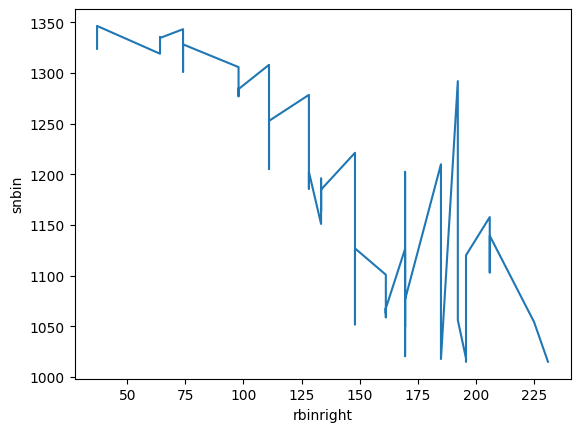

In [4]:
u.sn_radialbin(target_sn=1000, lineid='6563', rmin=0, rmax=250, pertsim=False)
print(len(u.snbinned_flux))

78


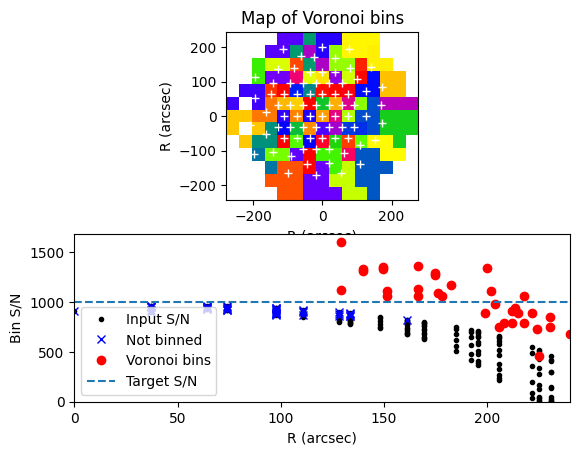

In [ ]:
u.voronoibin(target_sn=1000, lineid='6563') #Caution: run once after fitting lines in native simulation

In [5]:
u.runpyneb(niter=4, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:341: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


KeyboardInterrupt: 

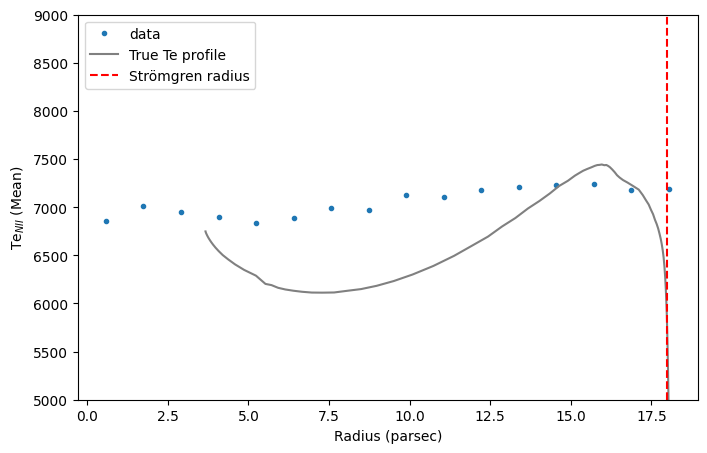

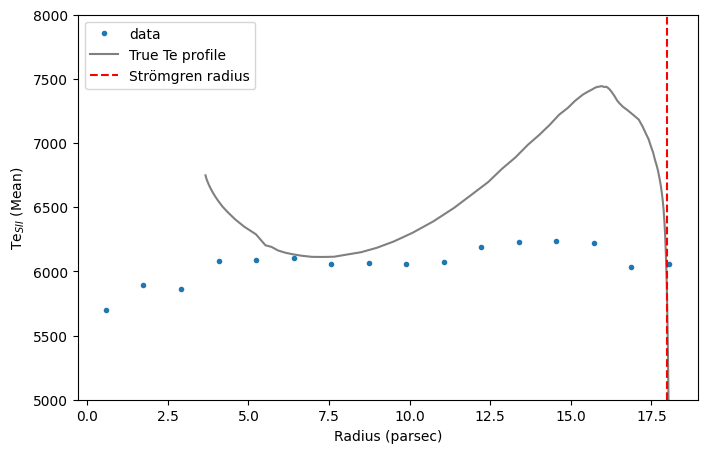

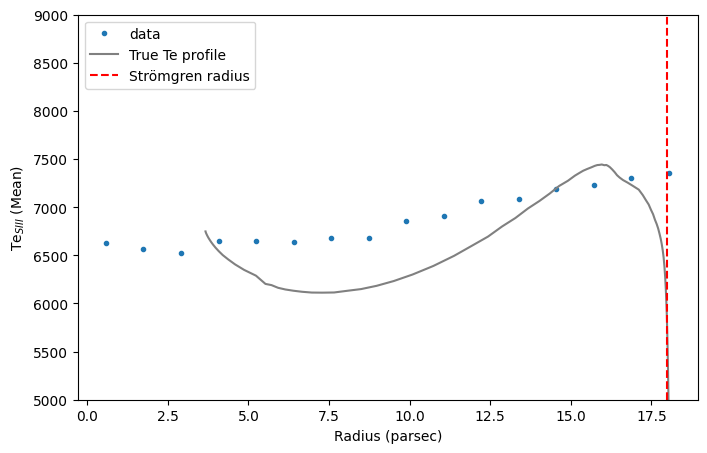

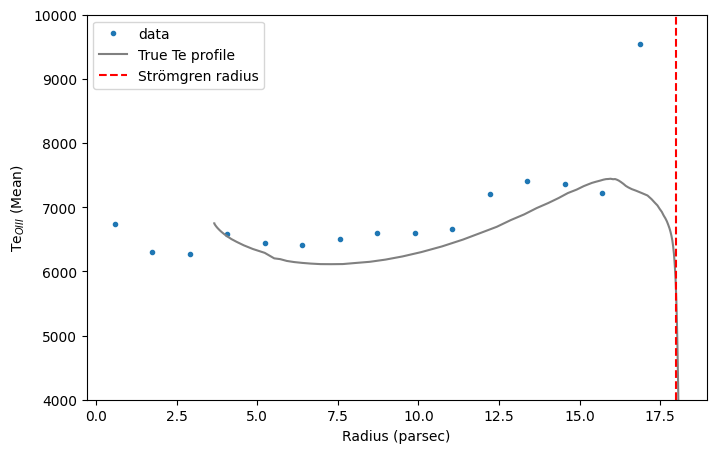

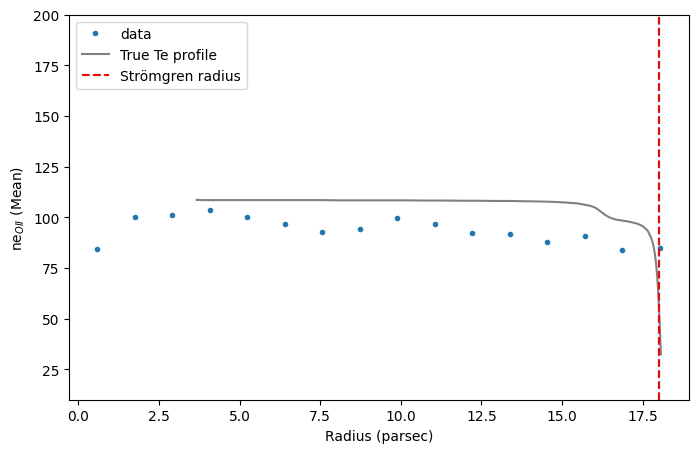

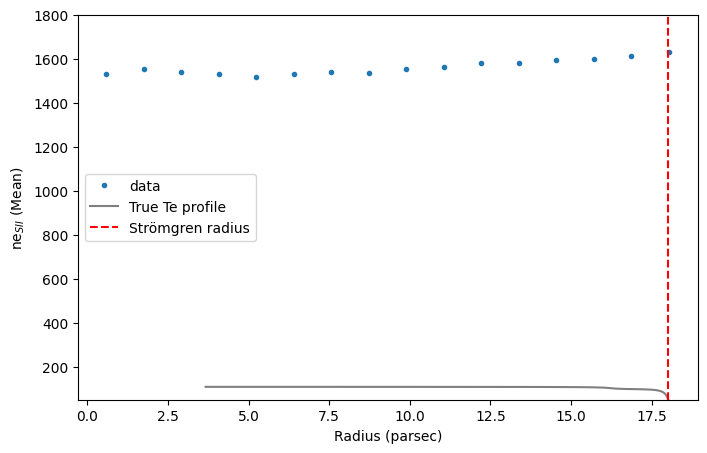

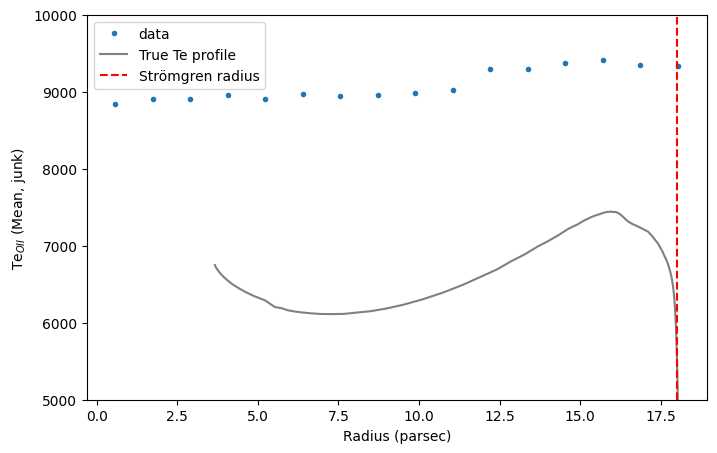

In [ ]:
#u.overplotprofile(u.linefitdict['TeN2'], u.vals[1], 5000 , 9000, title=r'Te$_{NII}$ (Mean)', output='TeN2',  radbin=True, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeS2'], u.vals[1], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=True, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeS3'], u.vals[1], 5000 , 9000, title=r'Te$_{SIII}$ (Mean)', output='TeS3', radbin=True, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], 4000 , 10000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=True, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['neO2'], u.vals[2], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=True, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['neS2'], u.vals[2], 50 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',    radbin=True, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO2'], u.vals[1], 5000 , 10000, title=r'Te$_{OII}$ (Mean, junk)', output='TeO2_junk', radbin=False, vorbin=False,  snbin=False)



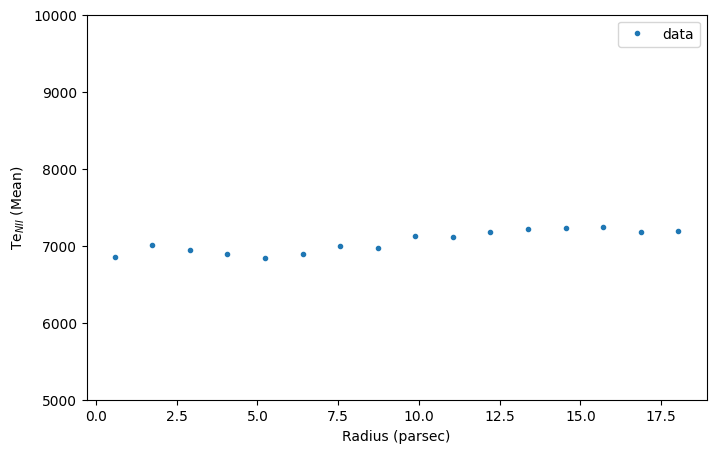

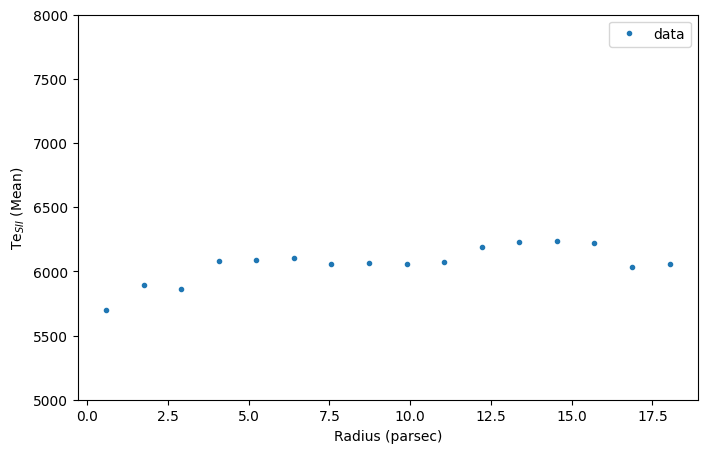

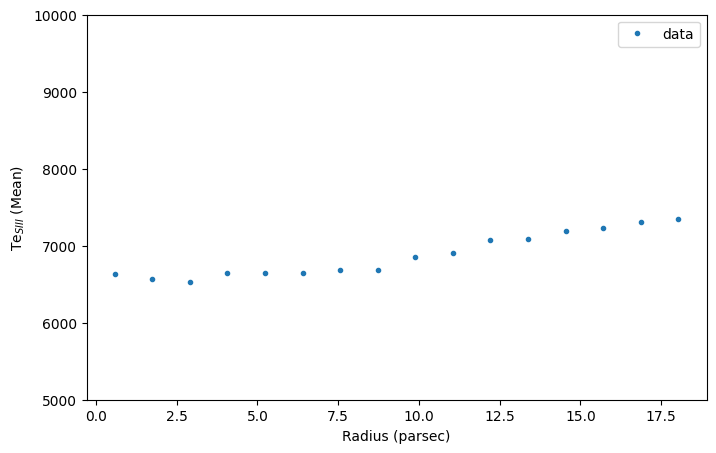

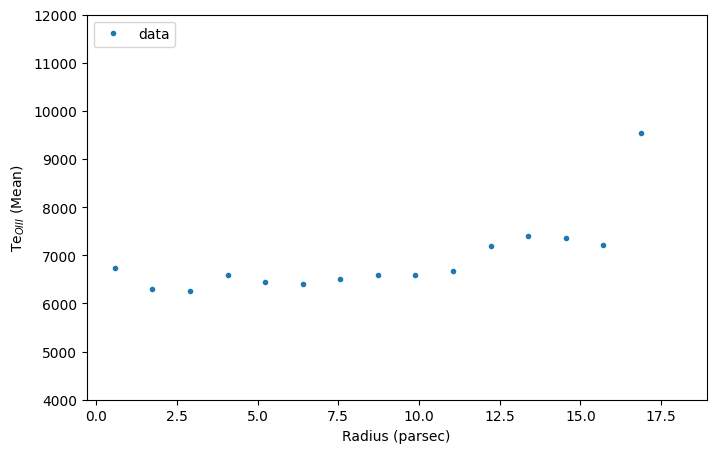

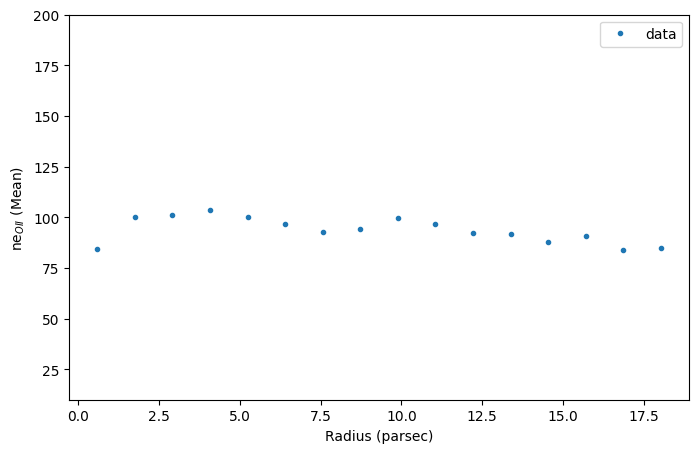

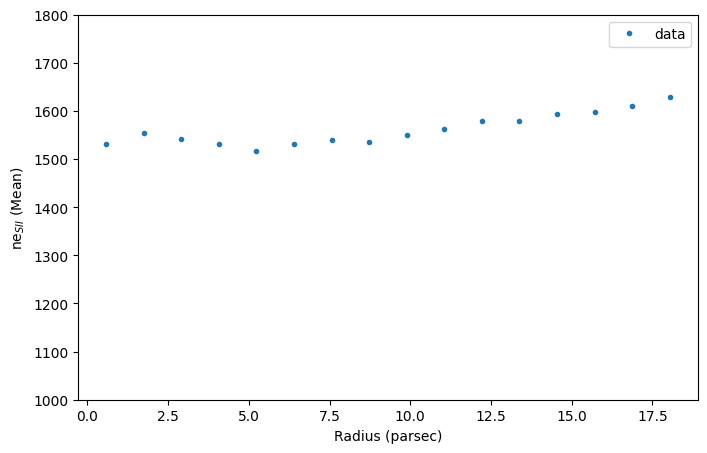

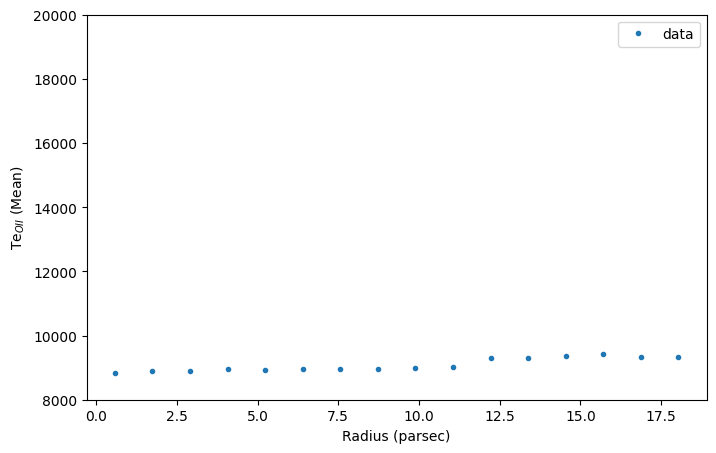

In [ ]:
#MakeRadialbin plot profiles
u.plotprofile(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=True, snbin=False)
u.plotprofile(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=True, snbin=False)
u.plotprofile(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=True, snbin=False)
u.plotprofile(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=True, snbin=False)
u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=True, snbin=False)
u.plotprofile(u.linefitdict['neS2'], 1000 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=True, snbin=False)
u.plotprofile(u.linefitdict['TeO2'], 8000 , 10000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=True, snbin=False)



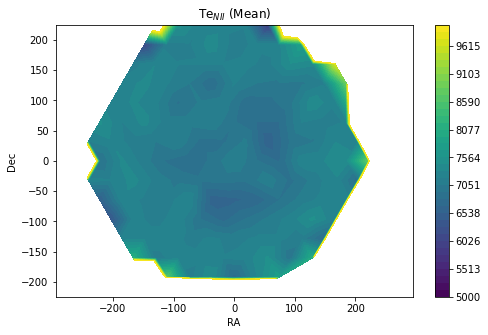

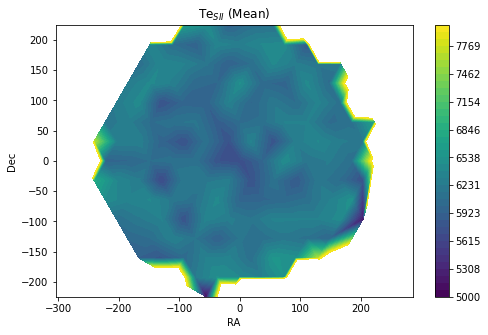

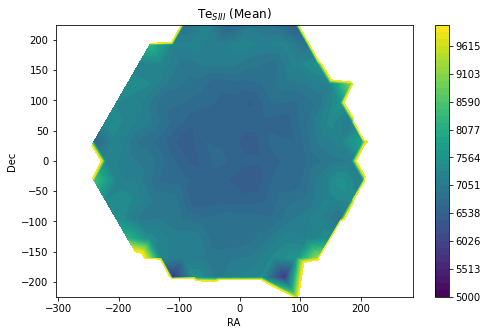

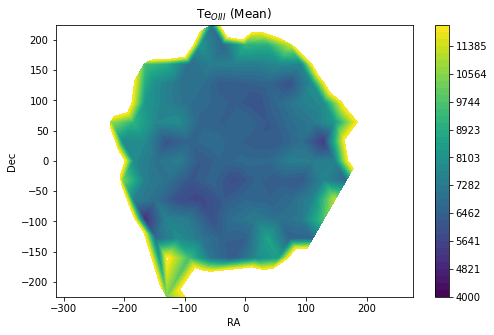

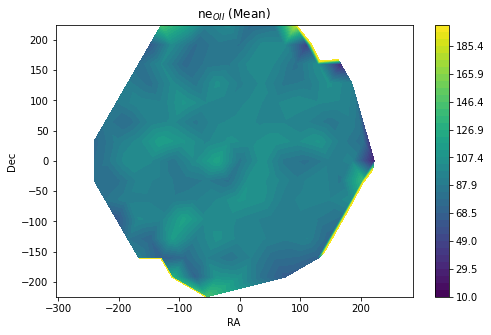

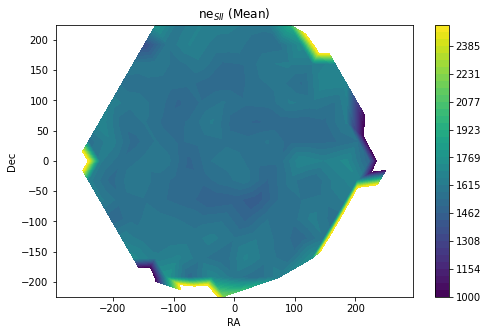

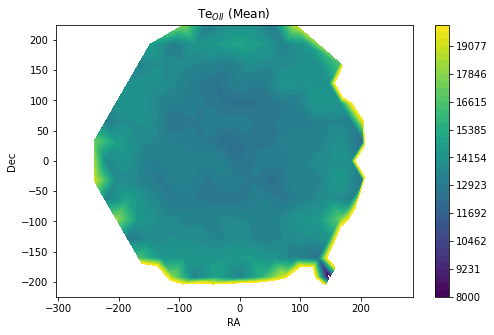

In [ ]:
#Make plot profiles
u.plotmap(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', vorbin=False)
u.plotmap(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  vorbin=False)
u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',vorbin=False)
u.plotmap(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',vorbin=False)
u.plotmap(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     vorbin=False)
u.plotmap(u.linefitdict['neS2'], 1000 , 2500, title=r'ne$_{SII}$ (Mean)', output='neS2',  vorbin=False)
u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, title=r'Te$_{OII}$ (Mean)', output='TeO2', vorbin=False)




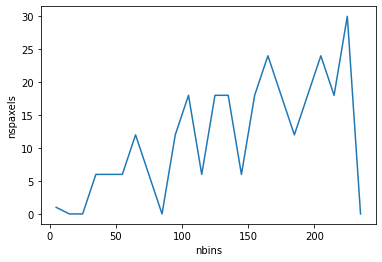

In [ ]:
u.radialbin(250, 10)

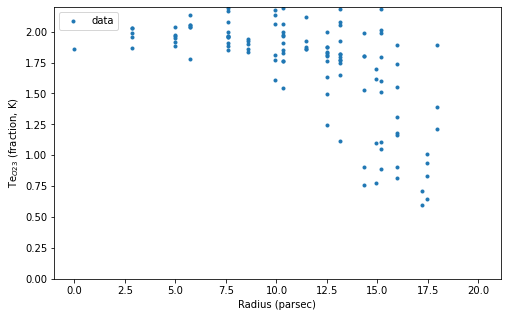

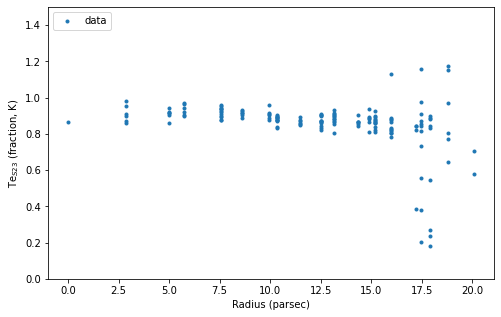

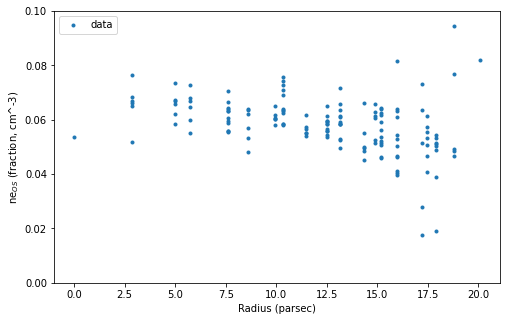

In [ ]:
u.plotprofile(np.divide(u.linefitdict['TeO2'], u.linefitdict['TeO3']), 0, 2.2, title=r'Te$_{O23}$ (fraction, K)', output='TeO23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['TeS2'], u.linefitdict['TeS3']), 0, 1.5, title=r'Te$_{S23}$ (fraction, K)', output='TeS23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['neO2'], u.linefitdict['neS2']), 0, 0.1, title=r'ne$_{OS}$ (fraction, cm^-3)', output='TeOS2 frac', vorbin=False)

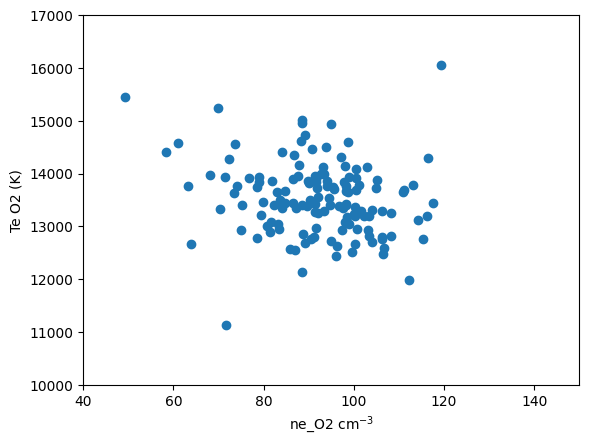

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neO2'], u.linefitdict['TeO2'])
plt.xlabel('ne_O2 cm$^{-3}$')
plt.ylabel('Te O2 (K)')
plt.ylim(10000, 17000)
plt.xlim(40, 150)
title='Te vs ne for OII.png'
plt.savefig(u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

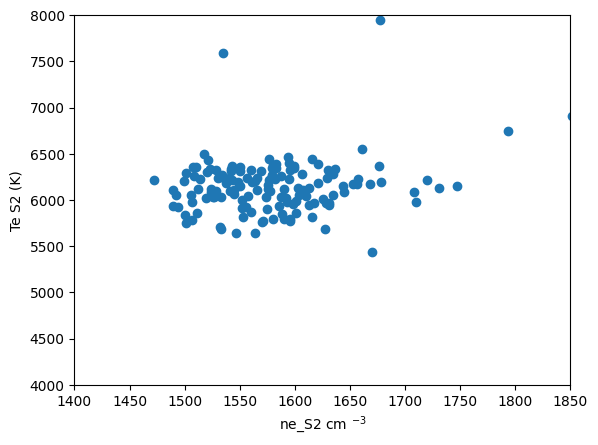

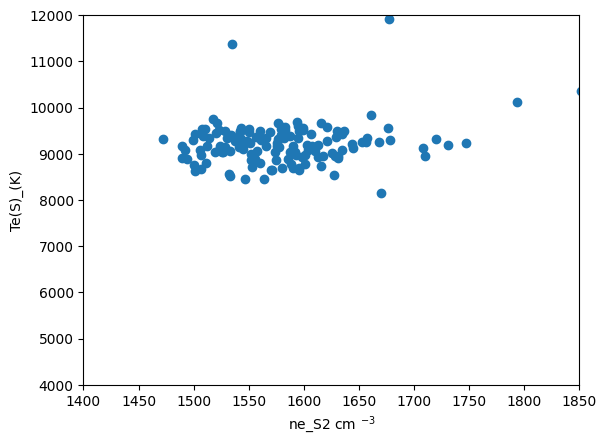

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neS2'], u.linefitdict['TeS2'])
plt.xlabel('ne_S2 cm $^{-3}$')
plt.ylabel('Te S2 (K)')
plt.ylim(4000, 8000)
plt.xlim(1400, 1850)
title='Te vs ne for SII.png'
plt.savefig(u.datadir+u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

fig, ax=plt.subplots()
ax.scatter(u.linefitdict['neS2'], u.linefitdict['TeS2']+u.linefitdict['TeS2']/2 )
ax.set_xlabel('ne_S2 cm $^{-3}$')
ax.set_ylabel('Te(S)_(K)')
ax.set_ylim(4000, 12000)
ax.set_xlim(1400, 1850)
title='Te(S) vs ne(SII).png'
plt.savefig(u.datadir+u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=200)

